<a href="https://colab.research.google.com/github/MelomanCat/FaceExtraction/blob/main/ColorHistograms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install facenet_pytorch

Processing frame 1
Face detected in frame 0
x1: 558, y1: 133, x2: 793, y2: 469


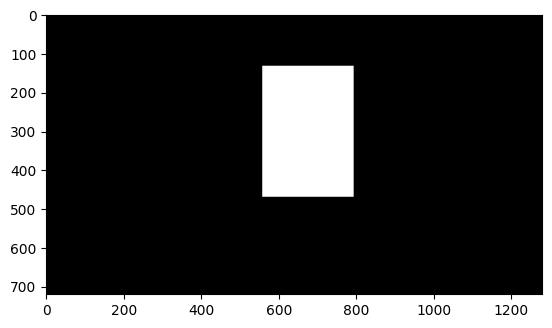

Image shape: (720, 1280, 3)
Mask shape: (720, 1280)
Min pixel value: 0
Max pixel value: 204


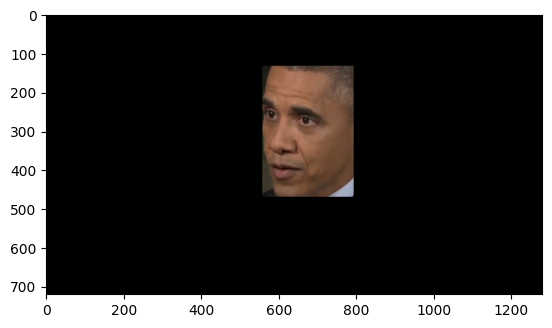

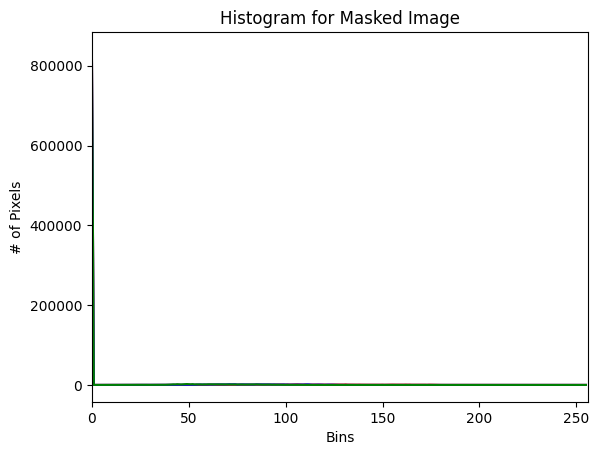

In [27]:
from facenet_pytorch import MTCNN
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import pandas as pd
import imutils
import matplotlib.pyplot as plt

# Create face detector
mtcnn = MTCNN(margin=20, keep_all=True, post_process=False)

# Load video
video_path = '/content/drive/MyDrive/Colab Notebooks/OriginalSequences/183.mp4'
cap = cv2.VideoCapture(video_path)
frame_count = min(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)), 1)

# Initialize DataFrame to store histograms
histograms_df = pd.DataFrame(columns=['Frame', 'Histogram'])

# Initialize colors for plotting histograms
colors = ("r", "b", "g")

# Process each frame
for frame_num in range(frame_count):
    # Read frame
    ret, frame = cap.read()
    if not ret:
        break

# Convert frame to RGB
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

print(f"Processing frame {frame_num + 1}")

# Detect faces
boxes, probs = mtcnn.detect(frame_rgb)

# Check if faces were detected
if boxes is not None:
    for box in boxes:
        x1, y1, x2, y2 = box.astype(int)

# Output message
print(f"Face detected in frame {frame_num}")

# Check the detected face coordinates
print(f"x1: {x1}, y1: {y1}, x2: {x2}, y2: {y2}")

# Output the mask
plt.imshow(mask, cmap='gray')
plt.show()

# Apply mask to the detected face region
mask = np.zeros(frame_rgb.shape[:2], dtype=np.uint8)
cv2.rectangle(mask, (x1, y1), (x2, y2), (255, 255, 255), -1)

# Convert mask to 3 channels image
mask_rgb = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)

print("Image shape:", frame_rgb.shape)
print("Mask shape:", mask.shape)

masked_face = cv2.bitwise_and(frame_rgb, mask_rgb)

print("Min pixel value:", np.min(masked_face))
print("Max pixel value:", np.max(masked_face))

# display the masked image
fig, ax = plt.subplots()
plt.imshow(masked_face)

# Defining function plot_histogram
def plot_histogram(image, title, mask=None):
    # split the image into its respective channels, then initialize
    # the tuple of channel names along with our figure for plotting
    chans = cv2.split(image)
    plt.figure()
    plt.title(title)
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")

    # Initialize an empty list to store histograms for each channel
    histograms = []

    # Split the image into its respective channels
    chans = cv2.split(masked_face)

    # Loop over the image channels
    for chan in chans:
        # Create a histogram for the current channel and plot it
        hist = cv2.calcHist([chan], [0], mask, [256], [0, 256])
        histograms.append(hist)

    # Plot histograms for each channel
    for hist, color in zip(histograms, colors):
        plt.plot(hist, color=color)
        plt.xlim([0, 256])

# Show the plot
plt.show()

# call on the function plot_histogram
plot_histogram(masked_face, "Histogram for Masked Image")

# Append histogram to DataFrame
histograms_df = pd.concat([histograms_df, pd.DataFrame({'Frame': frame_num, 'Histogram': hist.flatten()})], ignore_index=True)


# Save histograms DataFrame to file
histograms_df.to_csv('/content/drive/MyDrive/Colab Notebooks/OriginalSequences/histograms.csv', index=False)

# Release video capture
cap.release()